In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train, _), (test, _) = fashion_mnist.load_data()
print(train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


In [2]:
train = train[10000:]
valid = train[:10000]
print(train.shape)
print(valid.shape)

(50000, 28, 28)
(10000, 28, 28)


In [3]:
r = Sequential()
r.add(Rescaling(1/255.0))

In [5]:
train = r(train)
valid = r(valid)
test = r(test)

In [6]:
train.shape

TensorShape([50000, 28, 28])

In [9]:
train = np.asarray(train).astype('float32')
valid = np.asarray(valid).astype('float32')
test = np.asarray(test).astype('float32')

In [10]:
train.shape

(50000, 28, 28)

In [11]:
train = train.reshape(-1, 28, 28, 1)
valid = valid.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)
print(train.shape)

(50000, 28, 28, 1)


In [13]:
autoencoder = Sequential()
autoencoder.add(Conv2D(32, (3,3), activation='relu',padding='same', input_shape = (28, 28, 1)))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(16, (3,3), activation='relu',padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(8, (3,3), activation='relu',padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(8, (3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(16, (3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(32, (3,3), activation='relu'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(1, (3,3), activation='sigmoid', padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
history = autoencoder.fit(train, train, epochs = 50, validation_data = (valid, valid), callbacks = [early_stopping])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 72ms/step - loss: 0.3542 - val_loss: 0.2937
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 81ms/step - loss: 0.2923 - val_loss: 0.2888
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 78ms/step - loss: 0.2873 - val_loss: 0.2841
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - loss: 0.2839 - val_loss: 0.2818
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 68ms/step - loss: 0.2816 - val_loss: 0.2802
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - loss: 0.2790 - val_loss: 0.2802
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 67ms/step - loss: 0.2779 - val_loss: 0.2771
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - loss: 0.2774 - val_loss: 0.2761
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - loss: 0.2756 - val_loss: 0.2755
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - loss: 0.2760 - val_loss: 0.2760
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 67ms/step - loss: 0.2748 - val_loss: 0.27

In [19]:
loss = autoencoder.evaluate(test, test)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.2694
0.26953133940696716


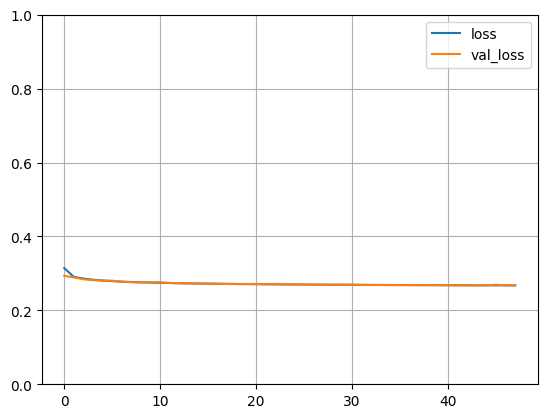

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
y = autoencoder.predict(test[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


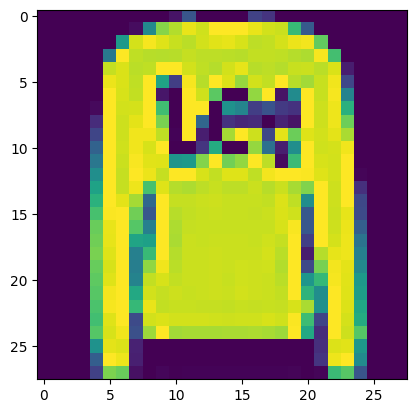

In [23]:
plt.imshow(test[1])
plt.show()

In [26]:
y.shape

(28, 28, 4, 1)

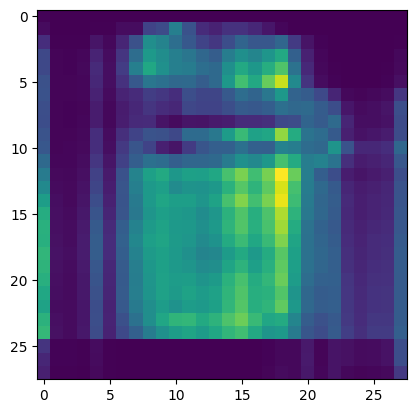

In [29]:
plt.imshow(y[:, :, 0, 0])
plt.show()